import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv(r"E:\sem8\Final\BCICIV_2a_all_patients_normalized1.csv")

# Get unique EEG channel names
eeg_channels = [col for col in df.columns if col.startswith('EEG-')]

# Group by patient and epoch (each group = one trial)
grouped = df.groupby(['patient', 'epoch'])

X = []
y = []

# Map textual labels to integers
label_map = {'left': 0, 'right': 1, 'foot': 2, 'tongue': 3}

for (patient, epoch), group in grouped:
    # Sort by time to ensure correct temporal order
    group_sorted = group.sort_values(by='time')

    # Extract EEG data
    data = group_sorted[eeg_channels].values  # shape: (time_steps, 22)
    X.append(data)

    # Take the label from the first row (same for all rows in a group)
    label = group_sorted['label'].iloc[0]
    y.append(label_map[label])

X = np.array(X)  # shape: (n_trials, time_steps, 22)
y = to_categorical(y, num_classes=4)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv(r"E:\sem8\Final\NEW_TRY\BCICIV_2a_all_patients_normalized1.csv")

# Get unique EEG channel names
eeg_channels = [col for col in df.columns if col.startswith('EEG-')]

# Group by patient and epoch (each group = one trial)
grouped = df.groupby(['patient', 'epoch'])

X = []
y = []

# Map textual labels to integers
label_map = {'left': 0, 'right': 1, 'foot': 2, 'tongue': 3}

for (patient, epoch), group in grouped:
    # Sort by time to ensure correct temporal order
    group_sorted = group.sort_values(by='time')

    # Extract EEG data
    data = group_sorted[eeg_channels].values  # shape: (time_steps, 22)
    X.append(data)

    # Take the label from the first row (same for all rows in a group)
    label = group_sorted['label'].iloc[0]
    y.append(label_map[label])

X = np.array(X)  # shape: (n_trials, time_steps, 22)
y = to_categorical(y, num_classes=4)


hello

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model 41.22% adam optimizer
model = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])
''' 
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])
'''
'''
# Build model  39.18%
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])''' 

#model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history =  model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50


c:\Python\Python365\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2642 - loss: 1.5596 - val_accuracy: 0.2571 - val_loss: 1.3842
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.2435 - loss: 1.3914 - val_accuracy: 0.2776 - val_loss: 1.3854
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2716 - loss: 1.3888 - val_accuracy: 0.2837 - val_loss: 1.3851
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2687 - loss: 1.3857 - val_accuracy: 0.2571 - val_loss: 1.3841
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2796 - loss: 1.3845 - val_accuracy: 0.2592 - val_loss: 1.3824
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.2622 - loss: 1.3819 - val_accuracy: 0.2592 - val_loss: 1.3805
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2939 - loss: 1.3743 - val_accuracy: 0.2469 - val_loss: 1.3771
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3326 - loss: 1.3695 - val_accuracy: 0.2776 - val_loss: 1.

In [3]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 33.27%


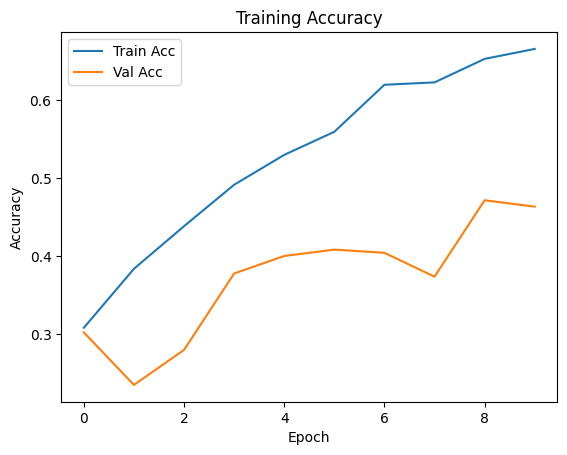

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert one-hot to class indices
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report: precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Left Hand', 'Right Hand', 'Both Feet', 'Tongue']))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
[[40 42 27 29]
 [44 36 16 30]
 [27 35 42 14]
 [22 20 21 45]]

Classification Report:
              precision    recall  f1-score   support

   Left Hand       0.30      0.29      0.30       138
  Right Hand       0.27      0.29      0.28       126
   Both Feet       0.40      0.36      0.38       118
      Tongue       0.38      0.42      0.40       108

    accuracy                           0.33       490
   macro avg       0.34      0.34      0.34       490
weighted avg       0.33      0.33      0.33       490



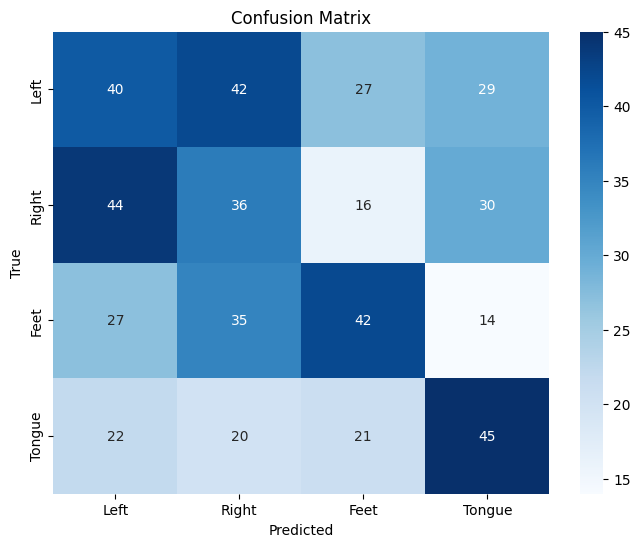

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Left', 'Right', 'Feet', 'Tongue'], yticklabels=['Left', 'Right', 'Feet', 'Tongue'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2

model1 = Sequential([
    # Temporal convolution (feature extraction over time)
    Conv1D(filters=32, kernel_size=15, activation='relu',
           input_shape=(X.shape[1], X.shape[2]), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Spatial convolution (across channels)
    Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(4, activation='softmax')  # 4 classes
])


In [24]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model1.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2954 - loss: 2.5637 - val_accuracy: 0.2469 - val_loss: 1.7280
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3904 - loss: 1.6722 - val_accuracy: 0.2571 - val_loss: 1.7482
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4520 - loss: 1.5408 - val_accuracy: 0.2755 - val_loss: 1.8294
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5043 - loss: 1.4713 - val_accuracy: 0.2469 - val_loss: 2.4509
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5498 - loss: 1.3932 - val_accuracy: 0.3633 - val_loss: 1.6542
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5627 - loss: 1.3224 - val_accuracy: 0.3408 - val_loss: 1.9804
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5891 - loss: 1.2468 - val_accuracy: 0.3000 - val_loss: 2.9911
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6362 - loss: 1.1966 - val_accuracy: 0.4714 - v

In [26]:
# Evaluate on test data
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 47.14%


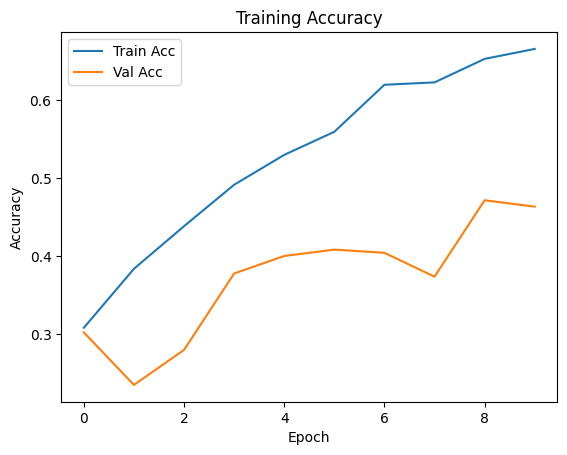

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert one-hot to class indices
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model1.predict(X_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report: precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Left Hand', 'Right Hand', 'Both Feet', 'Tongue']))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Confusion Matrix:
[[73 13 26 26]
 [29 36 21 40]
 [49 18 35 16]
 [21 12 23 52]]

Classification Report:
              precision    recall  f1-score   support

   Left Hand       0.42      0.53      0.47       138
  Right Hand       0.46      0.29      0.35       126
   Both Feet       0.33      0.30      0.31       118
      Tongue       0.39      0.48      0.43       108

    accuracy                           0.40       490
   macro avg       0.40      0.40      0.39       490
weighted avg       0.40      0.40      0.39       490

